## FISH WEIGHT PREDICTION

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error 
from sklearn.preprocessing import LabelEncoder, RobustScaler,StandardScaler
from sklearn.linear_model import LinearRegression, Ridge 
from sklearn. tree import DecisionTreeRegressor
from sklearn. ensemble import GradientBoostingRegressor,RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import LinearSVR

In [2]:
df=pd.read_csv('Fish.csv')

In [3]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
df.tail()

,Species,Weight,Length1,Length2,Length3,Height,Width
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,13.8,15.0,16.2,2.9322,1.8792


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,159.0,398.326415,357.978317,0.0000,120.00000,273.0000,650.0000,1650.000
Length1,159.0,26.247170,9.996441,7.5000,19.05000,25.2000,32.7000,59.000
Length2,159.0,28.415723,10.716328,8.4000,21.00000,27.3000,35.5000,63.400
Length3,159.0,31.227044,11.610246,8.8000,23.15000,29.4000,39.6500,68.000
Height,159.0,8.970994,4.286208,1.7284,5.94480,7.7860,12.3659,18.957
Width,159.0,4.417486,1.685804,1.0476,3.38565,4.2485,5.5845,8.142


In [6]:
df.shape

(159, 7)

In [7]:
df.isnull().mean()*100

Species    0.0
Weight     0.0
Length1    0.0
Length2    0.0
Length3    0.0
Height     0.0
Width      0.0
dtype: float64

In [8]:
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [10]:
df.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

# EXPLORATORY DATA ANALYSIS

## UNIVARIATE ANALYSIS

### HISTPLOT

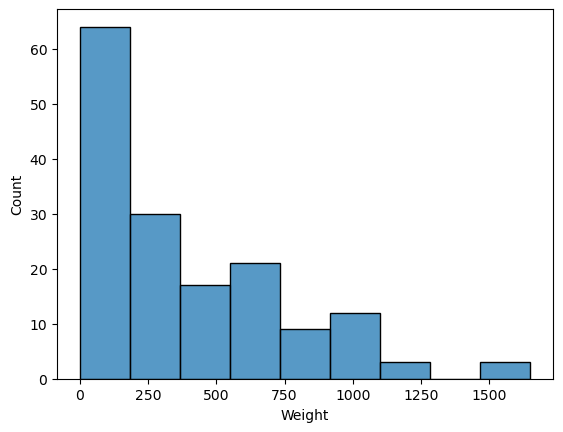

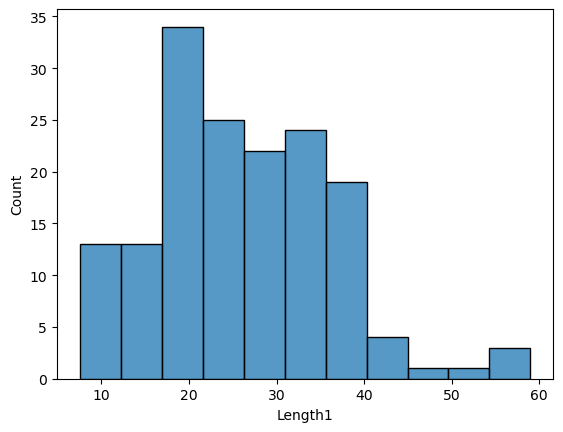

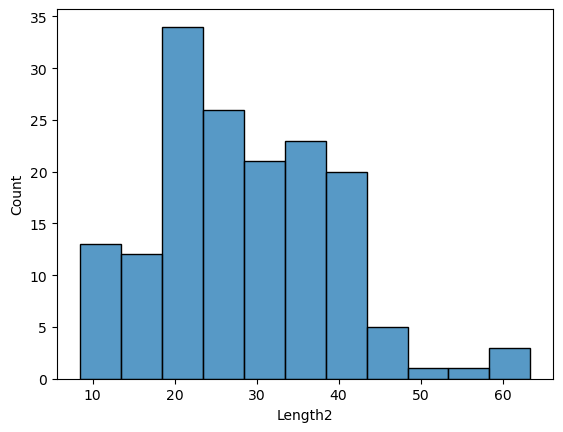

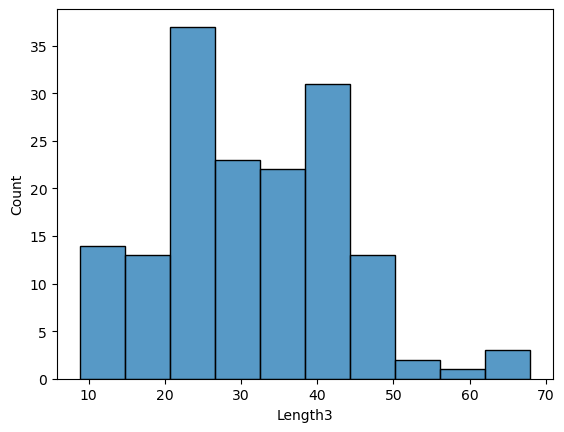

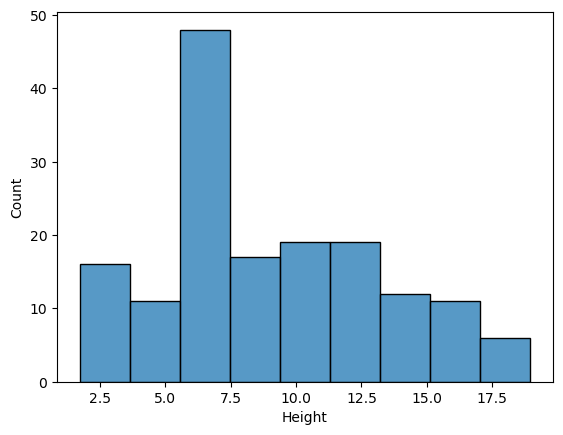

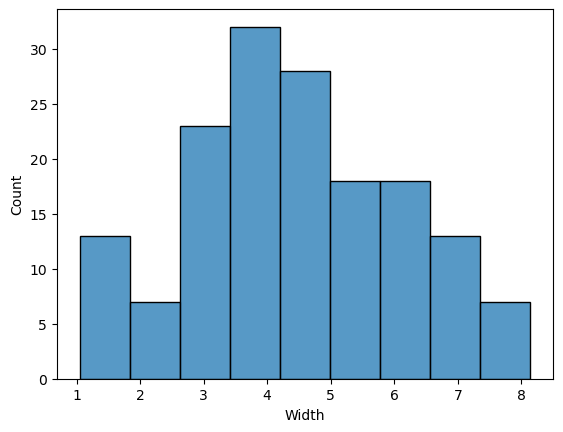

In [11]:
for i in df.columns:
    if df[i].dtype!='object':
        sns.histplot(data=df[i])
        plt.show();

### KDE PLOT

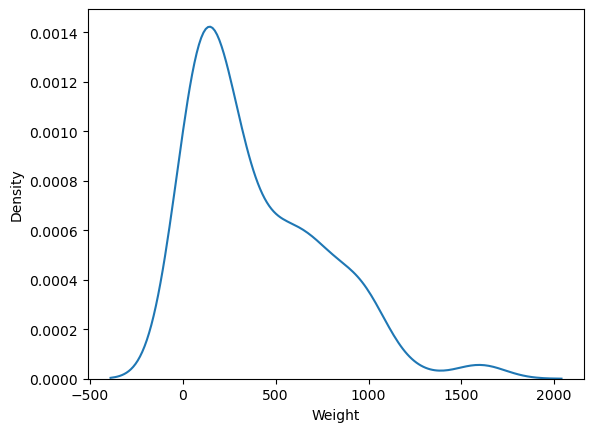

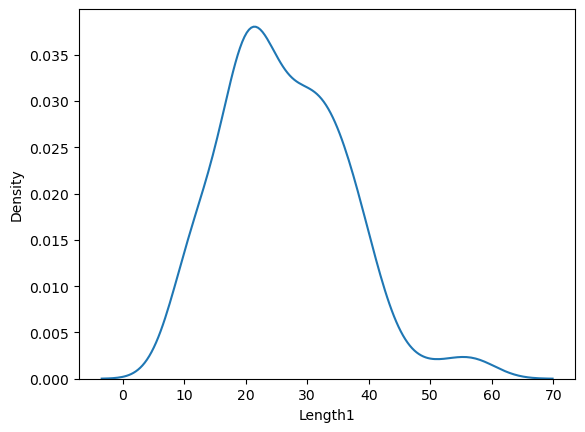

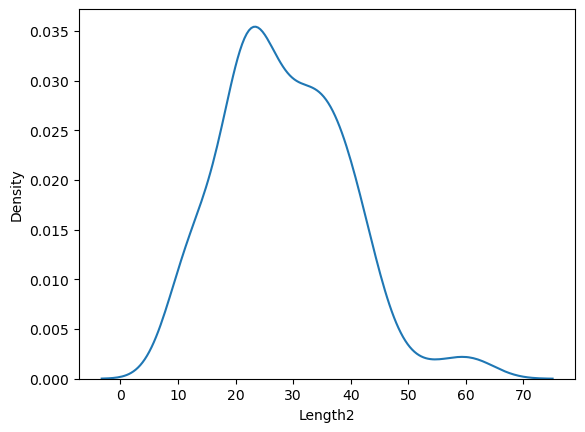

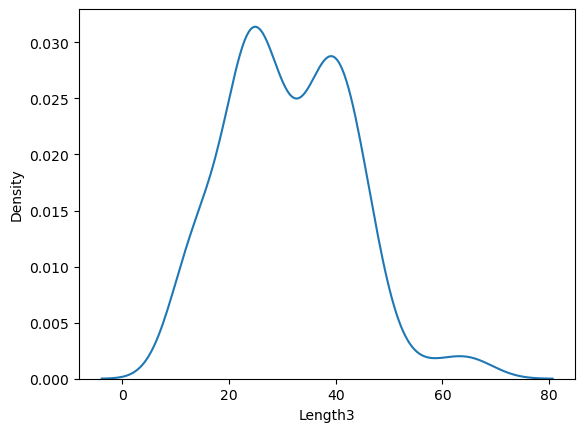

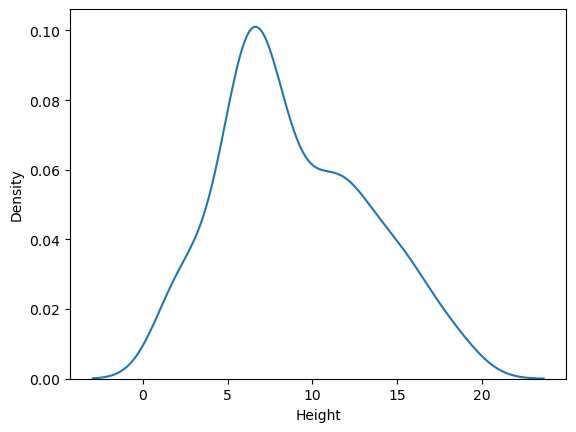

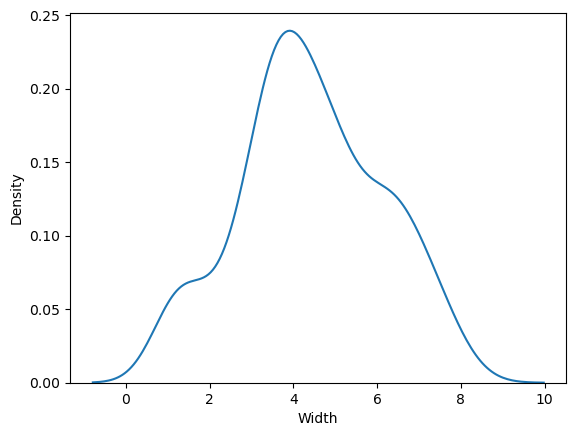

In [12]:
for i in df.columns:
    if df[i].dtype!='object':
        sns.kdeplot(data=df[i])
        plt.show();

### BOXPLOT

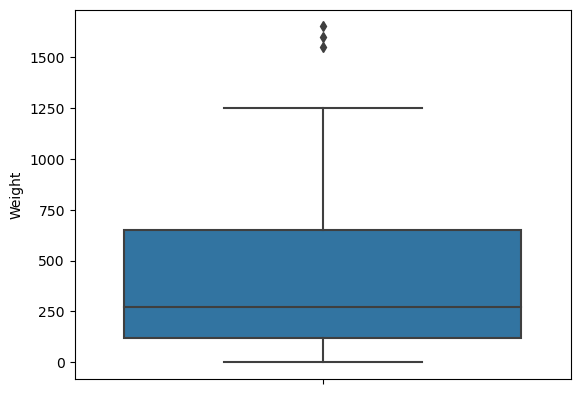

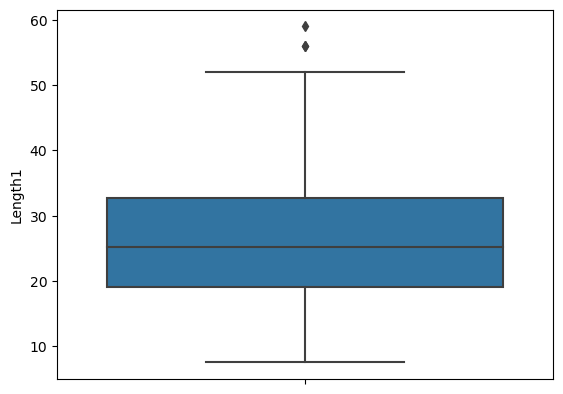

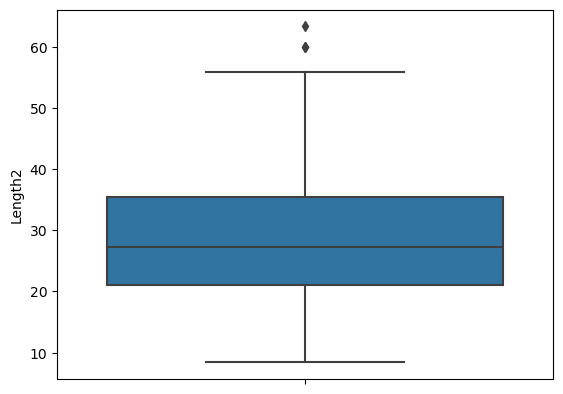

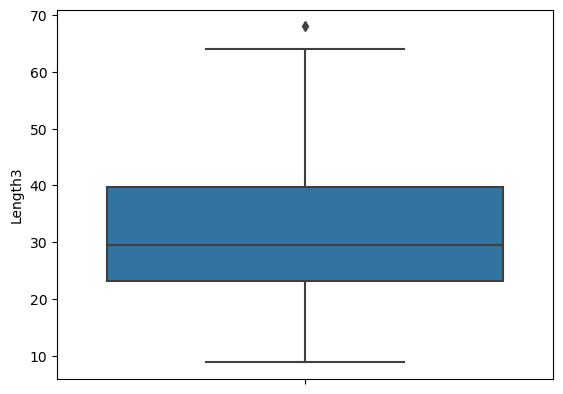

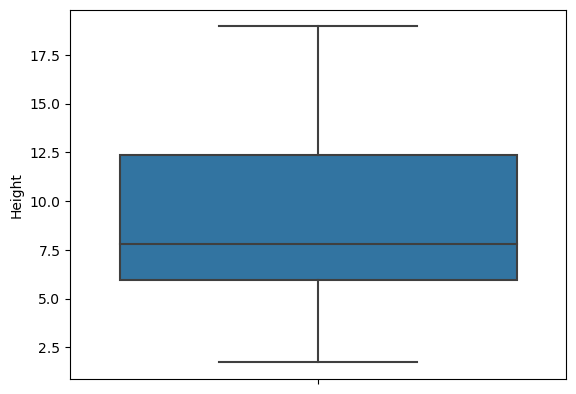

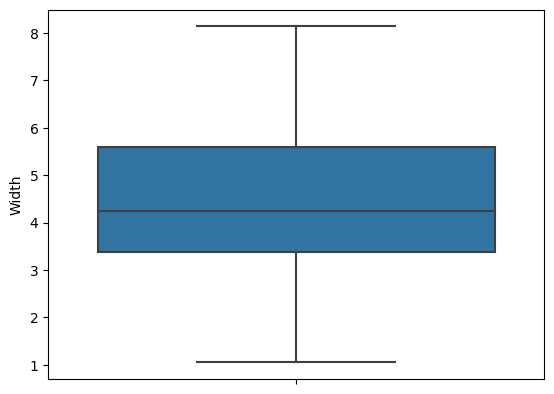

In [13]:
for i in df.columns:
    if df[i].dtype!='object':
        sns.boxplot(y=df[i])
        plt.show();

## MULTIVARIATE ANALYSIS

### BARPOLT

#### Species vs Height

<AxesSubplot:xlabel='Species', ylabel='Height'>

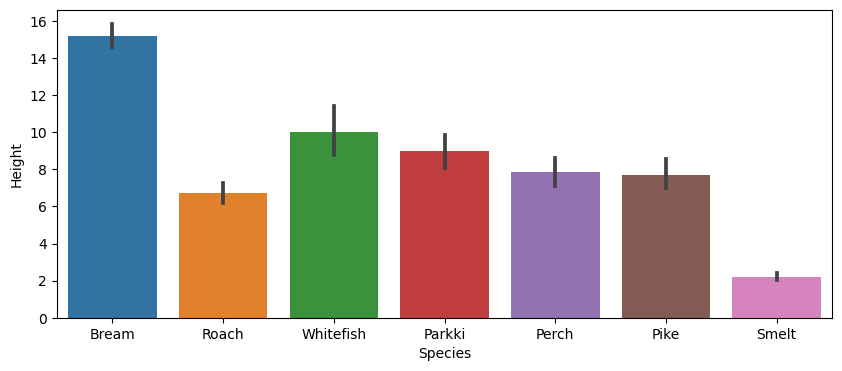

In [14]:
plt.figure(figsize=(10,4))
sns.barplot(x='Species', y='Height', data=df)

#### Species  vs Weight

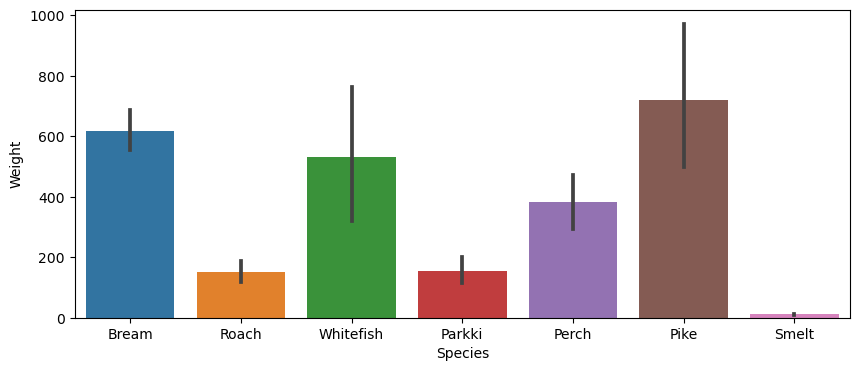

In [15]:
plt.figure(figsize=(10,4))
sns.barplot(x='Species', y='Weight', data=df);

#### Species VS Width

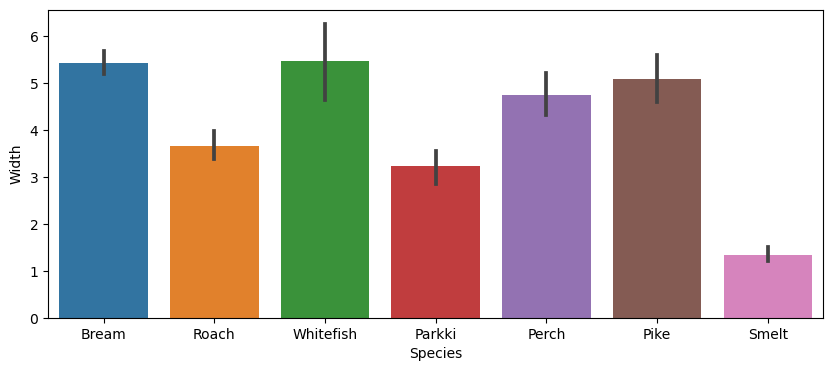

In [16]:
plt.figure(figsize=(10,4))
sns.barplot(x='Species', y='Width', data=df);

#### Species vs Length1

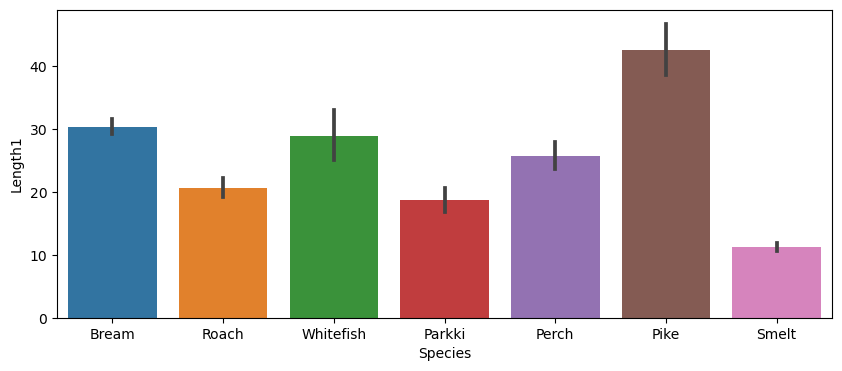

In [17]:
plt.figure(figsize=(10,4))
sns.barplot(x='Species', y='Length1', data=df);

#### Species vs Length2

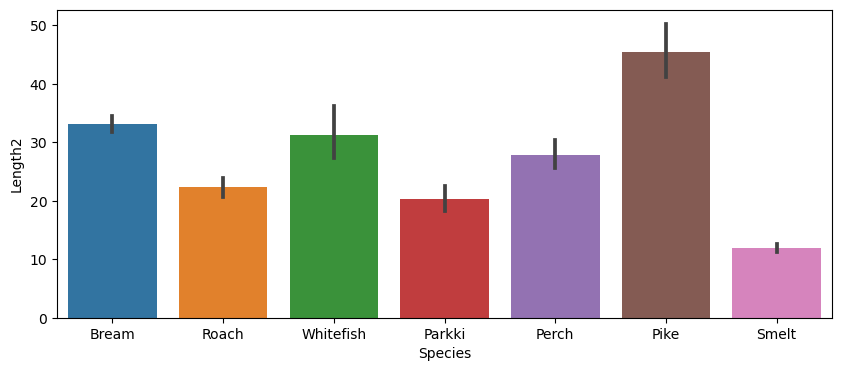

In [18]:
plt.figure(figsize=(10,4))
sns.barplot(x='Species', y='Length2', data=df);

#### Species vs Length3

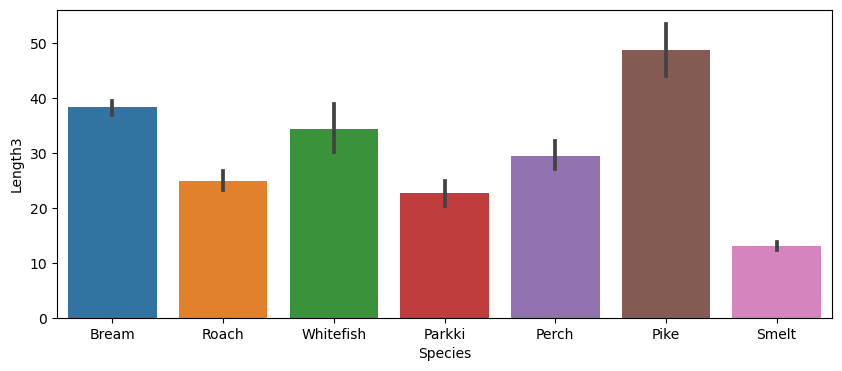

In [19]:
plt.figure(figsize=(10,4))
sns.barplot(x='Species', y='Length3', data=df);

### PIE CHART

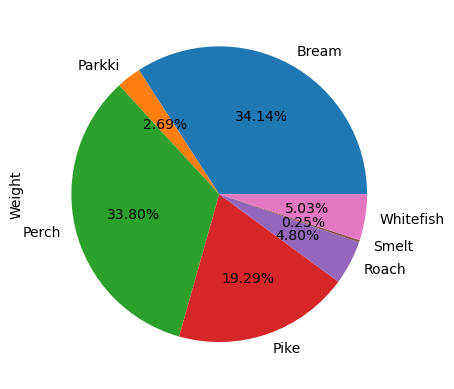

In [20]:
sp1 = df.groupby(['Species'])['Weight'].sum()
sp1.plot.pie(autopct='%1.2f%%');

### LINE PLOT

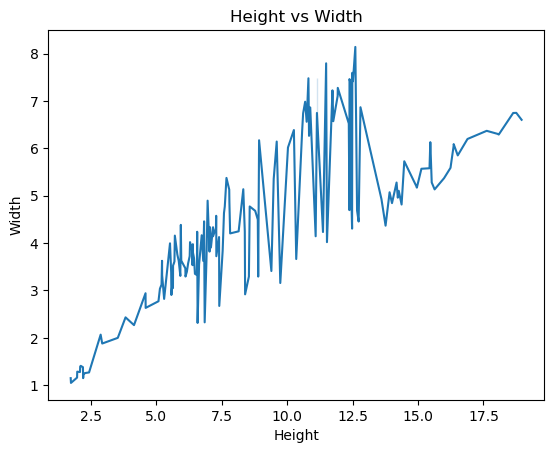

In [21]:
sns.lineplot('Height','Width',data=df)
plt.title('Height vs Width')
plt.show();

### PAIR PLOT

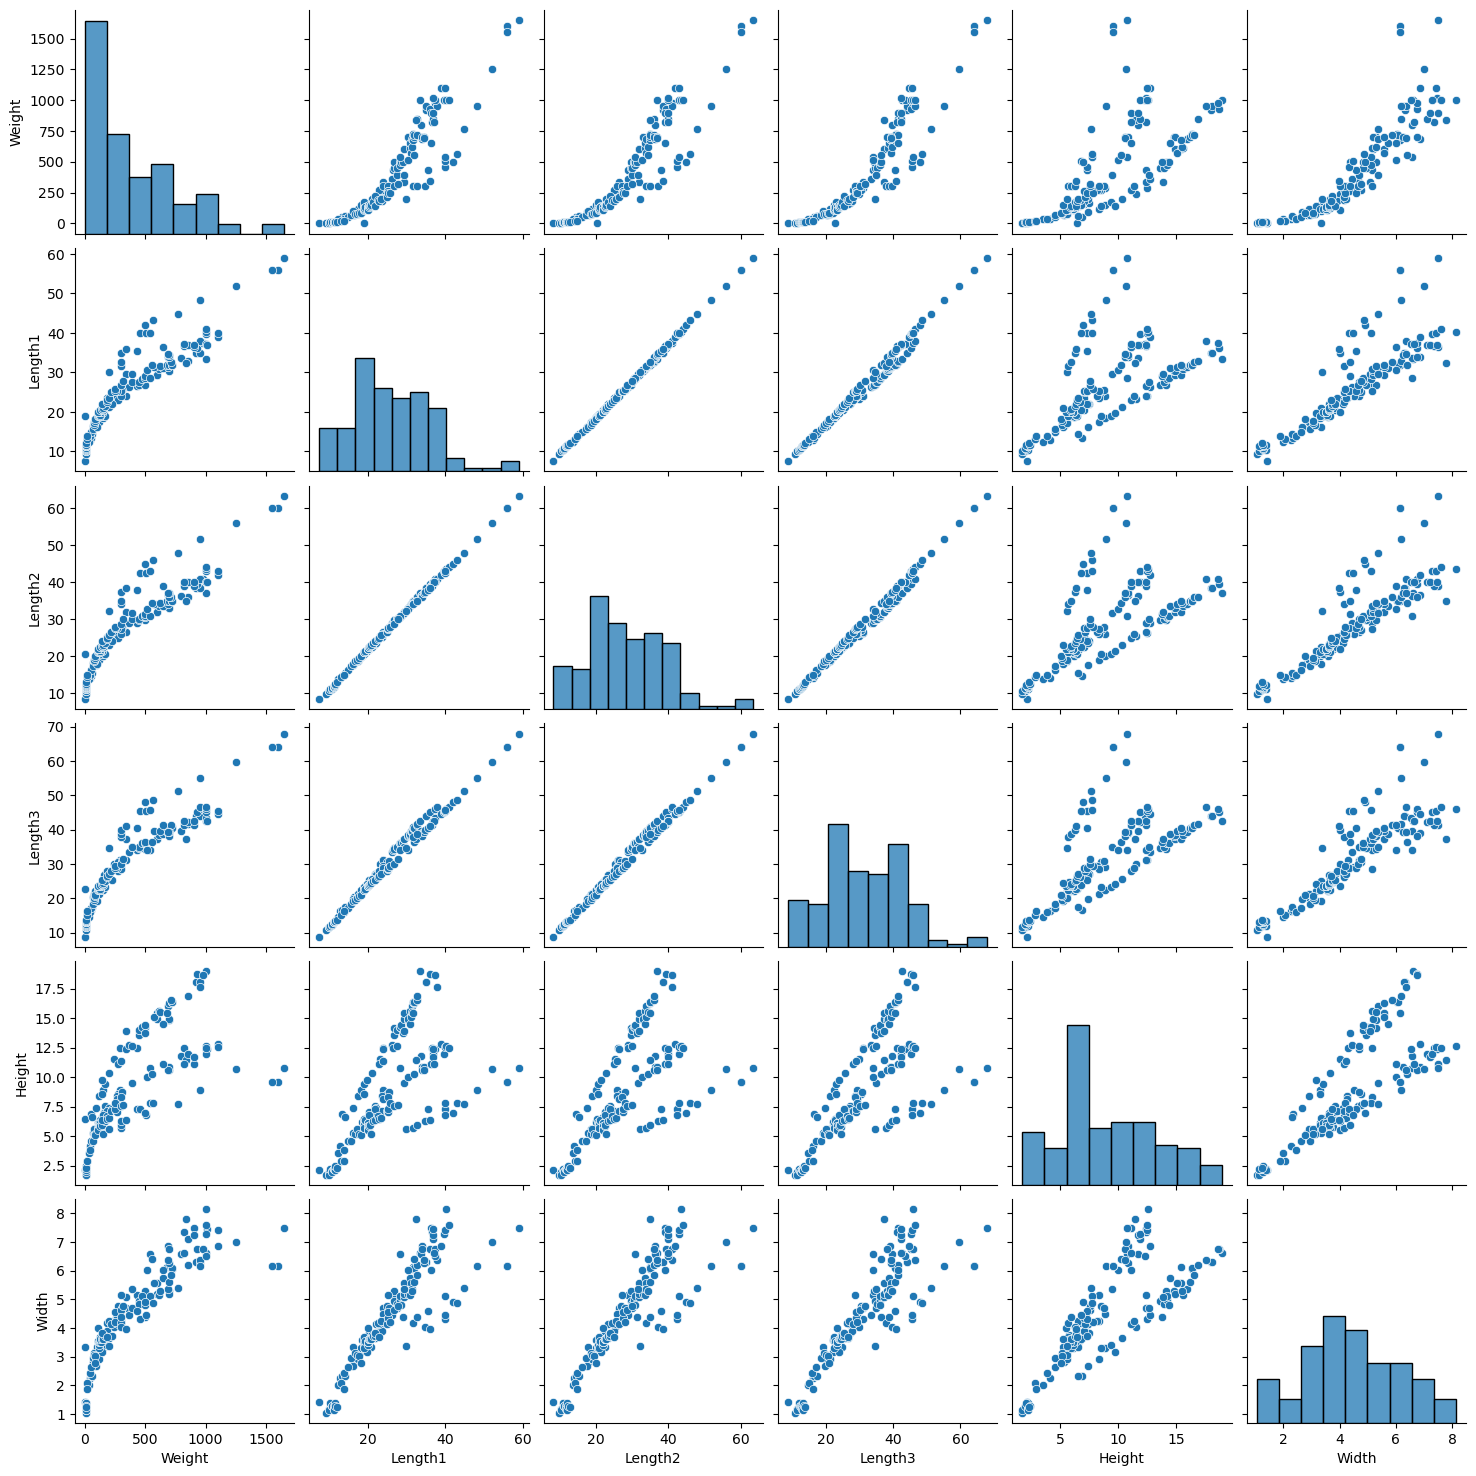

In [22]:
sns.pairplot(df)

## OUTLIER TREATMENT

In [23]:
def outlier_limit(col):
    Q3,Q1=np.nanpercentile (col,[75,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*IQR
    return UL,LL

In [24]:
for column in df.columns:
    if df[column].dtype!='object':
        UL,LL=outlier_limit(df[column])
        df[column]=np.where((df[column]>UL)|(df[column]<LL),np.nan,df[column])

In [25]:
df.dropna(inplace=True)

## LABEL ENCODING REQUIRED COLUMNS

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  156 non-null    object 
 1   Weight   156 non-null    float64
 2   Length1  156 non-null    float64
 3   Length2  156 non-null    float64
 4   Length3  156 non-null    float64
 5   Height   156 non-null    float64
 6   Width    156 non-null    float64
dtypes: float64(6), object(1)
memory usage: 9.8+ KB


In [27]:
le=LabelEncoder()

In [28]:
df['Species']=le.fit_transform(df['Species'])

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  156 non-null    int32  
 1   Weight   156 non-null    float64
 2   Length1  156 non-null    float64
 3   Length2  156 non-null    float64
 4   Length3  156 non-null    float64
 5   Height   156 non-null    float64
 6   Width    156 non-null    float64
dtypes: float64(6), int32(1)
memory usage: 9.1 KB


## CHECKING CORRELATION USING HEATMAP

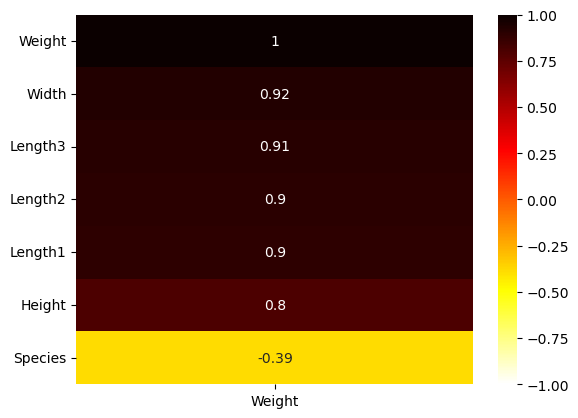

In [30]:
sns.heatmap(df.corr()[['Weight']].sort_values(by='Weight',ascending=False),vmin=-1,vmax=1,annot=True,cmap="hot_r");

## SELECTING X AND Y

In [31]:
df.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

In [32]:
x=df[['Length1','Length2','Width','Length3','Height']].values
y=df[['Weight']].values

## SCALING

In [33]:
sc = StandardScaler()
x=sc.fit_transform(x)

## CROSS VALIDATION

In [34]:
models={
'LinearRegression':LinearRegression(),
"Ridge":Ridge(),
"LinearSVR":LinearSVR(),
"DecisionTreeRegressor":DecisionTreeRegressor(),
"GradientBoostingRegressor":GradientBoostingRegressor(),
"AdaBoostRegressor":AdaBoostRegressor(),
"RandomForestRegressor":RandomForestRegressor()
}


In [35]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    rmse = np.sqrt(-scores)
    rmse_average = np.mean(rmse)
    print("AVERAGE RMSE: ",rmse_average)
    print("*"*100)

cross validation model : LinearRegression
AVERAGE RMSE:  140.26006476442498
****************************************************************************************************
cross validation model : Ridge
AVERAGE RMSE:  139.60919706929297
****************************************************************************************************
cross validation model : LinearSVR
AVERAGE RMSE:  313.6795187323455
****************************************************************************************************
cross validation model : DecisionTreeRegressor
AVERAGE RMSE:  120.83726572991482
****************************************************************************************************
cross validation model : GradientBoostingRegressor
AVERAGE RMSE:  73.23949267949824
****************************************************************************************************
cross validation model : AdaBoostRegressor
AVERAGE RMSE:  101.94704529824045
********************************************

## MODEL BUILDING USING RandomForestRegressor

In [36]:
model=RandomForestRegressor()

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [38]:
model.fit(x_train,y_train)
print('model trained with {}'.format(model))
training_score=model.score(x_train,y_train)*100
testing_score=model.score(x_test,y_test)*100
score=r2_score(y_test,model.predict(x_test))*100
mae=mean_absolute_error(y_test,model.predict(x_test))
mse=mean_squared_error(y_test,model.predict(x_test))
rmse=np.sqrt(mse)
y_pred = model.predict(x)
print("r2score:",score)
print('training_score:',training_score)
print('testing_score:',testing_score)
print('mae:',mae)
print('mse:',mse)
print("rmse_test:",rmse)

model trained with RandomForestRegressor()
r2score: 96.65803795032369
training_score: 99.54935525554617
testing_score: 96.65803795032369
mae: 36.9815
mse: 3148.8450376875003
rmse_test: 56.11457063622157


## PREDICTING Y

In [39]:
OUTPUT=pd.DataFrame(zip(y,y_pred),columns=("ACTUAL","PREDICTED"),dtype=float)
OUTPUT.head()

,ACTUAL,PREDICTED
0,242.0,262.29
1,290.0,308.32
2,340.0,329.22
3,363.0,373.22
4,430.0,433.27


## SCATTER PLOT

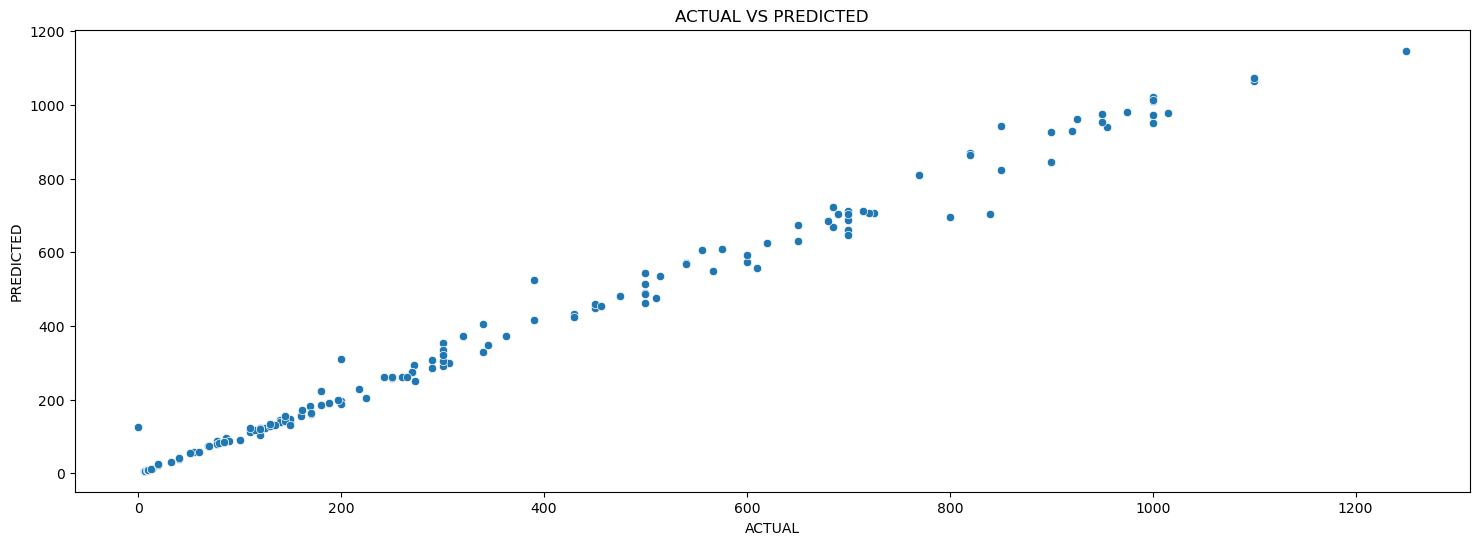

In [40]:
plt.figure(figsize=(18,6))
plt.title('ACTUAL VS PREDICTED')
sns.scatterplot(data=OUTPUT,x="ACTUAL",y="PREDICTED");